# Wine quality analysis with decision trees

The file `wine_quality.csv` contains information about chemical properties of some wines. Let's see if what we learned so far can help us to predict if a wine will be good based on its properties.

## Load, examine, clean, prepare

In [1]:
# Read and parse the wine_quality.csv file.

# The file is in CSV format. The pandas library is well
# suited to read and parse each field.
import pandas
data = pandas.read_csv("wine_quality.csv")

# We can take a look at the dataset to see what it contains.
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
# How many rows and columns does the dataset have ?

n_rows, n_cols = data.shape
print("The dataset has {} rows and {} columns.".format(
    n_rows, n_cols))

The dataset has 6497 rows and 13 columns.


In [3]:
# List all chemical properties of this dataset.

print("The chemical properties of each wine are:")
for col_name in data.columns:
    print("  -", col_name)

The chemical properties of each wine are:
  - type
  - fixed acidity
  - volatile acidity
  - citric acid
  - residual sugar
  - chlorides
  - free sulfur dioxide
  - total sulfur dioxide
  - density
  - pH
  - sulphates
  - alcohol
  - quality


In [4]:
# What kind of wines are present in this dataset ?

# With the previous question, we can see that the column
# `type` indicates what are the different kind of wines.
print("The different kind of wines in this dataset are:")
for kind in data.type.unique():
    print("  -", kind)

The different kind of wines in this dataset are:
  - white
  - red


In [5]:
# Find the right method to get the average/minimum/maximum value
# of each column (and only these 3 information per column)

# The method describe() of the DataFrame object `data` gives
# many information (including the average/minimum/maximum)
# but also other information like min/max or 1st/3rd quartile.
# We need to select only the interesting information (row).
data.describe().loc[["mean", "min", "max"]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
# Does this dataset have any missing information ?

data.isna().head(20)
# Yes, this dataset has some missing values. For example, we
# can see a value "True" in the 17th row of the table below.

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# How many missing values ?

# .sum() computes the sum for each column. It gives the
# number of missing values for each column (it interprets
# True as 1 and False as 0). We need a second .sum() to get
# the number of missing values in the entire dataframe.
print("There are {} missing values in the dataframe.".
     format(data.isna().sum().sum()))

There are 38 missing values in the dataframe.


In [8]:
# Which column has the most missing values ?

print("The column with the most missing values is '{}'.".
     format(data.isna().sum().idxmax()))

The column with the most missing values is 'fixed acidity'.


In [9]:
# Remove the rows which have at least 1 missing value.

n_before = len(data)
data = data.dropna(axis='index') # this axis drops the rows

# How many rows have been removed ?

n_after = len(data)
print("{} rows have been removed because they contained at "
      "least 1 missing value.".format(n_before - n_after))

34 rows have been removed because they contained at least 1 missing value.


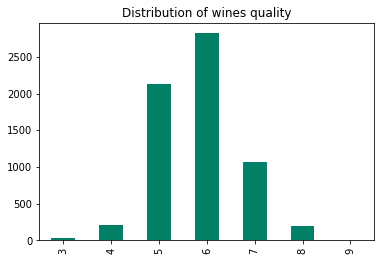

In [10]:
# Use an histogram to see see the repartition of
# the wine quality.

import matplotlib.pyplot as plt
%matplotlib inline

quality_histogram = data.quality.value_counts().sort_index()
quality_histogram.plot(kind="bar", colormap="summer")
plt.title("Distribution of wines quality")
plt.show()

In [11]:
# Let's consider that a wine is good if its quality is
# at least 7. Replace the values in the "quality" column
# with "good" if quality >= 7 and with "not good" otherwise.

# We use the function where() of the numpy library to 
# create a new column based on the values of another column.
import numpy as np
data.quality = np.where(data.quality >= 7, "good", "not good")

In [12]:
# Create the input data (i.e. the properties) and the
# label (i.e. the quality of wine) and assign them
# to 2 different variables X and y. Our machine learning
# algorithm needs to have both input and output data.

# We choose our label (the output of our model) to be the 
# quality of the wine (either "good" or "not good"). The
# other columns are used as the input data.
X = data.drop(["quality"], axis=1)
y = data.quality

In [13]:
# Separate your data into a training and a test set
# with 80% for the training set.

# 80% for the training set means that the test set has
# only 20% (0.2) of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                     test_size=0.2, random_state=0)

## Predicting wine quality with a decision tree

In [14]:
# Is this a classification or a regression problem ?
# Import the appropriate version of DecisionTree, then
# train it with your training data.

# We need to predict either the label "good" or "not good".
# This is a binary classification problem (only 2 possible
# class). We import the classifier version of DecisionTree.
from sklearn.tree import DecisionTreeClassifier
wine_tree = DecisionTreeClassifier(random_state=0)
wine_tree.fit(X_train, y_train)

ValueError: could not convert string to float: 'white'

In [15]:
# Oops, it seems that there is a problem! Indeed, most
# machine learning algorithms only work with numerical vectors.
# And our current training data still have some string values
# (like the type or the quality). We need to transform them before
# training our model.

# sklearn comes with tools to transform non-numerical values.
# In our case, we are going to use a LabelEncoder. Look at the
# documentation to learn what is does.

from sklearn.preprocessing import LabelEncoder
#?LabelEncoder

# now create two encoders: one for the `type` in X, the other
# for the `quality` in y. Use the trained encoders to transform
# X_train, X_test, y_train and y_test.

encoder_type = LabelEncoder()
encoder_quality = LabelEncoder()

encoder_type.fit(X.type)
encoder_quality.fit(y)

X_train.type = encoder_type.transform(X_train.type)
X_test.type = encoder_type.transform(X_test.type)
y_train = encoder_quality.transform(y_train)
y_test = encoder_quality.transform(y_test)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
# Now train again your Decision Tree.

wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [17]:
# What is the accuracy of your model (both on training
# and test sets) ? Do you think we are underfitting ? Overfitting ?

train_acc = wine_tree.score(X_train, y_train)
test_acc = wine_tree.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))

Train accuracy: 1.000
Test accuracy: 0.824


**Answer**: We are overfitting because the accuracy on the training set is perfect while it is not on the test set. It seems like the tree has learned by heart to predict the wine quality on the train dataset, but it cannot generalize well on data it has never seen (the test set).

In [18]:
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy
# you obtain?

# We create some decision trees with different parameters.
# Then we train them and keep the parameters which give the
# highest test accuracy.
import itertools
best_test_acc = 0
best_params = {}
range_max_depth   = range(3,21)
range_min_samples = range(5, 55, 5)
range_features    = range(2, X_train.shape[1])
for depth, samples, feature in itertools.product(
                                range_max_depth,
                                range_min_samples,
                                range_features):
    tree = DecisionTreeClassifier(max_depth=depth,
                                  min_samples_split=samples,
                                  max_features=feature,
                                  random_state=0)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test, y_test)
    if accuracy > best_test_acc:
        best_test_acc = accuracy
        best_params["depth"] = depth
        best_params["samples"] = samples
        best_params["feature"] = feature
        
print("Best test accuracy: {:.3f}".format(best_test_acc))
print("  - max_depth = ", best_params["depth"])
print("  - min_samples_split = ", best_params["samples"])
print("  - max_features = ", best_params["feature"])

Best test accuracy: 0.845
  - max_depth =  8
  - min_samples_split =  5
  - max_features =  10


**Answer**: With optimized hyperparameters, the test accuracy can reach 0.845.

In [19]:
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the quality of a wine?

# The feature_importances_ attribute is a numpy array where
# each value indicates the importance of the respective
# feature. But there is no mapping between a score and the
# chemical property it represents. We first build a DataFrame
# which contains both information.
z = pandas.DataFrame(wine_tree.feature_importances_,
                     index=X_train.columns,
                     columns=["Importance"])

# We can now sort by decreasing importance and take the
# first three features.
z.sort_values(by="Importance", ascending=False).head(3)

,Importance
alcohol,0.231164
residual sugar,0.093311
citric acid,0.091989


**Answer**: The three most important features to predict the quality of a wine are:
* alcohol
* sulphates
* residual sugar

## Predicting wine quality with random forests

We saw in the course (and in this example) that Decision Trees can easily overfit. To prevent this, we can use Random forests instead. Random forests are a collection of decision trees, where each decision tree is trained differently. The prediction of the RandomForest is then the average (or the most frequent) prediction of all the decision trees.

In [20]:
# Use a RandomForest composed of 20 decision trees and
# train it on your data. Evaluate its accuracy. Do you see
# an improvement ?
from sklearn.ensemble import RandomForestClassifier

wine_forest = RandomForestClassifier(n_estimators=20,
                                     random_state=0)
wine_forest.fit(X_train, y_train)
train_acc = wine_forest.score(X_train, y_train)
test_acc = wine_forest.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))

Train accuracy: 0.998
Test accuracy: 0.874


**Answer**: There is an improvment. The train accuracy has decrease a little bit (0.998 vs. 1.0) and most importantly, the test accuracy has increased (0.874 vs. 0.824).

In [21]:
# Train other random forest classifiers with different
# hyperparameters (n_estimators, max_features). Can you beat
# the best accuracy you obtained with a single decision tree ?

# Instead of creating manually a new random forest with
# different hyperparameters, we create them automatically
# by iterating over lists of range values. We keep the 
# hyperparameters that maximize the test accuracy.
best_test_acc = 0
best_params = {}
range_n_estimators = [5, 10, 15, 20, 30, 40, 50, 75, 100]
range_max_depth    = [3, 5, 7, 9, 11, 13, 15]
range_max_features = [4, 8, 12]
for estimator, depth, feature in itertools.product(
                                    range_n_estimators,
                                    range_max_depth,
                                    range_max_features):
    forest = RandomForestClassifier(n_estimators=estimator,
                                    max_depth=depth,
                                    max_features=feature,
                                    random_state=0)
    forest.fit(X_train, y_train)
    accuracy = forest.score(X_test, y_test)
    if accuracy > best_test_acc:
        best_test_acc = accuracy
        best_params["estimator"] = estimator
        best_params["depth"] = depth
        best_params["feature"] = feature
        
print("Best test accuracy: {:.3f}".format(best_test_acc))
print("  - n_estimators = ", best_params["estimator"])
print("  - max_depth = ", best_params["depth"])
print("  - max_features = ", best_params["feature"])

Best test accuracy: 0.885
  - n_estimators =  50
  - max_depth =  13
  - max_features =  12


**Answer**: with a RandomForest and tuned hyperparameters, we can achieve a test accuracy of 0.885, which is better than with a single DecisionTree (0.845).